# Example 79 - Mars SmallSat Aerocapture Demonstration - Part 1

This examples analyzes a ADEPT Drag Modulation Aerocapture vehicle concept flying to Mars as a secondary payload.

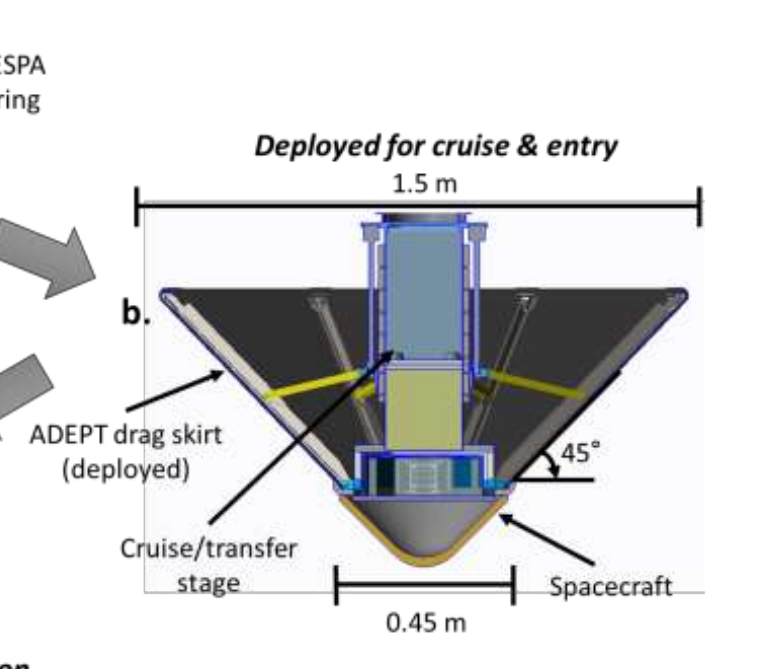

In [1]:
from IPython.display import Image
Image(filename='../plots/adept-ac-vehicle.png', width=500)

Image credit: Alex Austin et al, IAC 2019

In [2]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [3]:
import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
planet = Planet('MARS')
planet.loadAtmosphereModel('../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 150.0E3

In [16]:
# Set up a vehicle objects, one for 450 km circular, one for 1-sol orbit
vehicle1=Vehicle('MarsSmallSat1', 50, 20, 0.0, np.pi*1.5**2, 0.0, 0.303, planet)
vehicle1.setInitialState(150.0,0.0,0.0,5.74,0.0,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 9)

First, find the corridor bounds to select a target nominal EFPA for a nominal Mars atmosphere, with inertial correction.

In [17]:
underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 4500.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  4500.0)

print("450 km circ.")
print("----------------")
print(underShootLimit, exitflag_us)
print(overShootLimit,  exitflag_os)
print("----------------")

450 km circ.
----------------
-12.151415676307806 1.0
-11.14071945186879 1.0
----------------


## Propagate guided entry at mid-corridor

In [29]:
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=10.0E3

# Set target orbit = 450 km x 450 km, tolerance = 50 km
vehicle1.setTargetOrbitParams(450.0, 5100.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0, 
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)


# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(20, 9)

# Set vehicle initial state
vehicle1.setInitialState(150.0,0.0,0.0,5.74,0.0,-11.55,0.0,0.0)

# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(1.0,1.0,0.1,2400.0)

H (km): 148.85 HDOT (m/s): -1142.95  PRED. APO: 0.00
H (km): 147.71 HDOT (m/s): -1136.62  PRED. APO: 0.00
H (km): 146.58 HDOT (m/s): -1130.28  PRED. APO: 0.00
H (km): 145.45 HDOT (m/s): -1123.93  PRED. APO: 0.00
H (km): 144.33 HDOT (m/s): -1117.58  PRED. APO: 0.00
H (km): 143.22 HDOT (m/s): -1111.21  PRED. APO: 0.00
H (km): 142.11 HDOT (m/s): -1104.85  PRED. APO: 0.00
H (km): 141.01 HDOT (m/s): -1098.47  PRED. APO: 0.00
H (km): 139.91 HDOT (m/s): -1092.09  PRED. APO: 0.00
H (km): 138.82 HDOT (m/s): -1085.70  PRED. APO: 0.00
H (km): 137.74 HDOT (m/s): -1079.30  PRED. APO: 0.00
H (km): 136.67 HDOT (m/s): -1072.89  PRED. APO: 0.00
H (km): 135.60 HDOT (m/s): -1066.48  PRED. APO: 0.00
H (km): 134.53 HDOT (m/s): -1060.07  PRED. APO: 0.00
H (km): 133.48 HDOT (m/s): -1053.64  PRED. APO: 0.00
H (km): 132.43 HDOT (m/s): -1047.21  PRED. APO: 0.00
H (km): 131.38 HDOT (m/s): -1040.77  PRED. APO: 0.00
H (km): 130.34 HDOT (m/s): -1034.33  PRED. APO: 0.00
H (km): 129.31 HDOT (m/s): -1027.87  PRED. APO

H (km): 50.61 HDOT (m/s): -111.26  PRED. APO: 6620.48
H (km): 50.50 HDOT (m/s): -107.64  PRED. APO: 6086.37
H (km): 50.39 HDOT (m/s): -104.11  PRED. APO: 5599.62
H (km): 50.29 HDOT (m/s): -100.68  PRED. APO: 5143.04
H (km): 50.19 HDOT (m/s): -97.35  PRED. APO: 4715.17
H (km): 50.09, HDOT: -94.12, PREDICT. APO. ALT. :16096.830690094757
H (km): 50.00, HDOT: -91.53, PREDICT. APO. ALT. :15906.383006752614
H (km): 49.91, HDOT: -88.94, PREDICT. APO. ALT. :15717.216502051
H (km): 49.82, HDOT: -86.36, PREDICT. APO. ALT. :15529.409727353159
H (km): 49.74, HDOT: -83.80, PREDICT. APO. ALT. :15343.03509774565
H (km): 49.66, HDOT: -81.24, PREDICT. APO. ALT. :15158.159361757633
H (km): 49.58, HDOT: -78.69, PREDICT. APO. ALT. :14974.844024937564
H (km): 49.50, HDOT: -76.16, PREDICT. APO. ALT. :14793.145731370825
H (km): 49.42, HDOT: -73.63, PREDICT. APO. ALT. :14613.11660701478
H (km): 49.35, HDOT: -71.12, PREDICT. APO. ALT. :14434.804568505238
H (km): 49.28, HDOT: -68.62, PREDICT. APO. ALT. :14258.2

H (km): 61.85, HDOT: 202.60, PREDICT. APO. ALT. :4613.794624691418
H (km): 62.05, HDOT: 203.98, PREDICT. APO. ALT. :4605.8340310011245
H (km): 62.26, HDOT: 205.35, PREDICT. APO. ALT. :4598.022657316249
H (km): 62.46, HDOT: 206.71, PREDICT. APO. ALT. :4590.357618080693
H (km): 62.67, HDOT: 208.08, PREDICT. APO. ALT. :4582.837111021898
H (km): 62.88, HDOT: 209.44, PREDICT. APO. ALT. :4575.460445864384
H (km): 63.09, HDOT: 210.81, PREDICT. APO. ALT. :4568.227490397436
H (km): 63.30, HDOT: 212.17, PREDICT. APO. ALT. :4561.1365327832855
H (km): 63.51, HDOT: 213.53, PREDICT. APO. ALT. :4554.183370320023
H (km): 63.73, HDOT: 214.89, PREDICT. APO. ALT. :4547.36121860789
H (km): 63.94, HDOT: 216.25, PREDICT. APO. ALT. :4540.660736775203
H (km): 64.16, HDOT: 217.60, PREDICT. APO. ALT. :4534.072595795146
H (km): 64.38, HDOT: 218.96, PREDICT. APO. ALT. :4527.5922449788695
H (km): 64.60, HDOT: 220.31, PREDICT. APO. ALT. :4521.220947601281
H (km): 64.82, HDOT: 221.66, PREDICT. APO. ALT. :4514.965950

H (km): 96.82, HDOT: 364.13, PREDICT. APO. ALT. :4315.153119882011
H (km): 97.18, HDOT: 365.40, PREDICT. APO. ALT. :4315.081362948261
H (km): 97.55, HDOT: 366.67, PREDICT. APO. ALT. :4315.013067412402
H (km): 97.92, HDOT: 367.94, PREDICT. APO. ALT. :4314.94801091358
H (km): 98.28, HDOT: 369.20, PREDICT. APO. ALT. :4314.886001208987
H (km): 98.65, HDOT: 370.47, PREDICT. APO. ALT. :4314.82686321613
H (km): 99.03, HDOT: 371.74, PREDICT. APO. ALT. :4314.770436478805
H (km): 99.40, HDOT: 373.00, PREDICT. APO. ALT. :4314.716570129823
H (km): 99.77, HDOT: 374.27, PREDICT. APO. ALT. :4314.665118484443
H (km): 100.15, HDOT: 375.53, PREDICT. APO. ALT. :4314.615941077786
H (km): 100.52, HDOT: 376.79, PREDICT. APO. ALT. :4314.5689037952825
H (km): 100.90, HDOT: 378.05, PREDICT. APO. ALT. :4314.523879462239
H (km): 101.28, HDOT: 379.32, PREDICT. APO. ALT. :4314.480748409914
H (km): 101.66, HDOT: 380.58, PREDICT. APO. ALT. :4314.439399359389
H (km): 102.04, HDOT: 381.84, PREDICT. APO. ALT. :4314.399

In [1]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.v_kms_full, vehicle1.h_km_full, 'r-', linewidth=2.0)

plt.xlabel('Planet-relative speed, km/s',fontsize=14)
plt.ylabel('Altitude, km',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.show()

NameError: name 'plt' is not defined

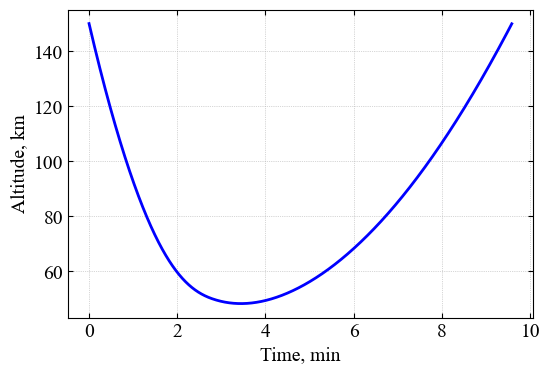

In [31]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.t_min_full, vehicle1.h_km_full, 'b-', linewidth=2.0)

plt.xlabel('Time, min',fontsize=14)
plt.ylabel('Altitude, km',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.show()

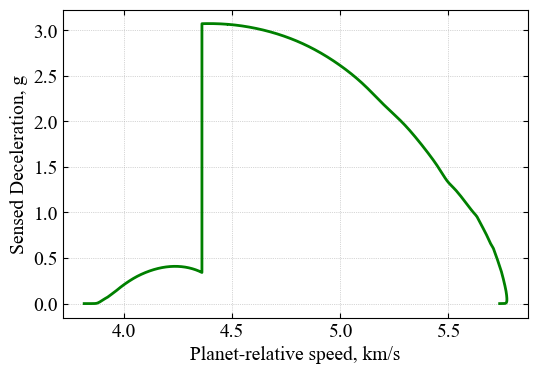

In [32]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.v_kms_full, vehicle1.acc_net_g_full, 'g-', linewidth=2.0)

plt.xlabel('Planet-relative speed, km/s',fontsize=14)
plt.ylabel('Sensed Deceleration, g',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)


plt.show()

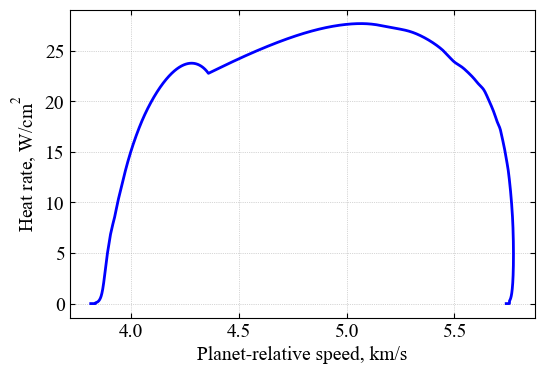

In [33]:
plt.figure(figsize=(6,4))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.plot(vehicle1.v_kms_full, vehicle1.q_stag_total_full, 'b-', linewidth=2.0)

plt.xlabel('Planet-relative speed, km/s',fontsize=14)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.show()

In [34]:
vehicle1.terminal_apoapsis

4312.406976691475

In [12]:
vehicle1.terminal_periapsis

6.029933639411815

In [13]:
vehicle1.periapsis_raise_DV

105.29832540459802